<a href="https://colab.research.google.com/github/Hailey103/My-first-project/blob/main/California_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np

In [25]:
# prompt: read excel housing.xlxs

df = pd.read_excel('housing.xlsx')
print(df.head())


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income ocean_proximity  median_house_value  
0         322         126         8.3252        NEAR BAY              452600  
1        2401        1138         8.3014        NEAR BAY              358500  
2         496         177         7.2574        NEAR BAY              352100  
3         558         219         5.6431        NEAR BAY              341300  
4         565         259         3.8462        NEAR BAY              342200  


In [26]:
# prompt: check missing values

print(df.isnull().sum())


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64


In [29]:
# prompt: replace it by the mean of this column

# Replace NaN values in 'total_bedrooms' with the mean of the column
df['total_bedrooms'].fillna(df['total_bedrooms'].mean(), inplace=True)

# Print the updated DataFrame
print(df.isnull().sum())


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64


<ipython-input-29-cb1b3d30ec84>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(df['total_bedrooms'].mean(), inplace=True)


In [30]:
X = df.drop("median_house_value", axis=1)  # Remove the target column to get the input features
Y = df["median_house_value"]  # Extract the target column as the output

In [31]:
# prompt: print X and Y

print("X (Input Features):")
print(X.head())  # Print the first few rows of X

print("\nY (Target Variable):")
print(Y.head())  # Print the first few rows of Y


X (Input Features):
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income ocean_proximity  
0         322         126         8.3252        NEAR BAY  
1        2401        1138         8.3014        NEAR BAY  
2         496         177         7.2574        NEAR BAY  
3         558         219         5.6431        NEAR BAY  
4         565         259         3.8462        NEAR BAY  

Y (Target Variable):
0    452600
1    358500
2    352100
3    341300
4    342200
Name: median_house_value, dtype: int64


In [32]:
# prompt: check descriptive statistics

print(df.describe())


          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20640.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        419.266592   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        297.00000

In [34]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY


In [36]:
# prompt: convert values in X.ocean_proximity into numerical values by one hot encoding

X = pd.get_dummies(X, columns=['ocean_proximity'], prefix=['ocean'])



KeyError: "None of [Index(['ocean_proximity'], dtype='object')] are in the [columns]"

In [37]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_<1H OCEAN,ocean_INLAND,ocean_ISLAND,ocean_NEAR BAY,ocean_NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,False,False,False,True,False
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,False,False,False,True,False
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,False,False,False,True,False
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,False,False,False,True,False
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,False,False,False,True,False


In [40]:
# prompt: Convert the encoded ocean columns to numerical data type (e.g., int)

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Iterate through columns with object data type
for column in X.select_dtypes(include=['bool']):
  # Fit and transform the column using label encoding
  X[column] = label_encoder.fit_transform(X[column])

X.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_<1H OCEAN,ocean_INLAND,ocean_ISLAND,ocean_NEAR BAY,ocean_NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,0,0,0,1,0


In [41]:
X.dtypes

,0
longitude,float64
latitude,float64
housing_median_age,int64
total_rooms,int64
total_bedrooms,float64
population,int64
households,int64
median_income,float64
ocean_<1H OCEAN,int64
ocean_INLAND,int64


4.Split the dataset :

Split the data into 80% training dataset and 20% test dataset.

In [43]:
# prompt: Split the data into 80% training dataset and 20% test dataset

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)


X_train shape: (16512, 13)
X_test shape: (4128, 13)
Y_train shape: (16512,)
Y_test shape: (4128,)


5.Standardize data :

Standardize training and test datasets.

In [44]:
# prompt: Standardize training and test datasets.

from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test = scaler.transform(X_test)

print("X_train standardized:\n", X_train[:5])
print("X_test standardized:\n", X_test[:5])


X_train standardized:
 [[ 1.27258656 -1.3728112   0.34849025  0.22256942  0.21122752  0.76827628
   0.32290591 -0.326196   -0.89468316 -0.68057418 -0.01556621 -0.35564565
   2.62975816]
 [ 0.70916212 -0.87669601  1.61811813  0.34029326  0.59309419 -0.09890135
   0.6720272  -0.03584338 -0.89468316 -0.68057418 -0.01556621 -0.35564565
   2.62975816]
 [-0.44760309 -0.46014647 -1.95271028 -0.34259695 -0.49522582 -0.44981806
  -0.43046109  0.14470145 -0.89468316 -0.68057418 -0.01556621 -0.35564565
   2.62975816]
 [ 1.23269811 -1.38217186  0.58654547 -0.56148971 -0.40930582 -0.00743434
  -0.38058662 -1.01786438 -0.89468316 -0.68057418 -0.01556621 -0.35564565
   2.62975816]
 [-0.10855122  0.5320839   1.14200767 -0.11956547 -0.25655915 -0.48587717
  -0.31496232 -0.17148831 -0.89468316  1.46934754 -0.01556621 -0.35564565
  -0.3802631 ]]
X_test standardized:
 [[ 2.85347282e-01  1.95100000e-01 -2.86323693e-01 -5.22861572e-01
  -1.49476515e-03 -3.03010896e-02 -3.70086730e-01 -1.15508475e+00
  -8.94

Perform Linear Regression :
Perform Linear Regression on training data.
Predict output for test dataset using the fitted model.
Print root mean squared error (RMSE) from Linear Regression.

In [45]:
# prompt: Perform Linear Regression on training data

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math

# Create a Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, Y_train)

# Predict the output for the test dataset using the fitted model
Y_pred = model.predict(X_test)

# Calculate the Root Mean Squared Error (RMSE)
rmse = math.sqrt(mean_squared_error(Y_test, Y_pred))

# Print the RMSE
print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 70031.41991955665


In [46]:
# prompt: Predict output for test dataset using the fitted model.

# Y_pred is already calculated in the provided code.
# You can access it directly to see the predictions for the test dataset.

print("Predictions for Test Dataset (Y_pred):")
Y_pred



Predictions for Test Dataset (Y_pred):


array([ 64629.45079786, 134799.34083607, 266063.38139054, ...,
       439180.98341181, 120797.55240621, 183386.04993584])

Perform Decision Tree Regression :

Perform Decision Tree Regression on training data.
Predict output for test dataset using the fitted model.
Print root mean squared error from Decision Tree Regression.

In [48]:
# prompt: Perform Decision Tree Regression :
# Perform Decision Tree Regression on training data.
# Predict output for test dataset using the fitted model.
# Print root mean squared error from Decision Tree Regression.

from sklearn.tree import DecisionTreeRegressor

# Create a Decision Tree Regression model
dt_model = DecisionTreeRegressor()

# Fit the model on the training data
dt_model.fit(X_train, Y_train)

# Predict the output for the test dataset using the fitted model
dt_Y_pred = dt_model.predict(X_test)

# Calculate the Root Mean Squared Error (RMSE) for Decision Tree Regression
dt_rmse = math.sqrt(mean_squared_error(Y_test, dt_Y_pred))

# Print the RMSE for Decision Tree Regression
print("Root Mean Squared Error (RMSE) from Decision Tree Regression:", dt_rmse)


Root Mean Squared Error (RMSE) from Decision Tree Regression: 69004.19976400169


Perform Random Forest Regression :

Perform Random Forest Regression on training data.
Predict output for test dataset using the fitted model.
Print RMSE (root mean squared error) from Random Forest Regression.


In [49]:
# prompt: Perform Random Forest Regression :
# Perform Random Forest Regression on training data.
# Predict output for test dataset using the fitted model.
# Print RMSE (root mean squared error) from Random Forest Regression.

from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regression model
rf_model = RandomForestRegressor()

# Fit the model on the training data
rf_model.fit(X_train, Y_train)

# Predict the output for the test dataset using the fitted model
rf_Y_pred = rf_model.predict(X_test)

# Calculate the Root Mean Squared Error (RMSE) for Random Forest Regression
rf_rmse = math.sqrt(mean_squared_error(Y_test, rf_Y_pred))

# Print the RMSE for Random Forest Regression
print("Root Mean Squared Error (RMSE) from Random Forest Regression:", rf_rmse)


Root Mean Squared Error (RMSE) from Random Forest Regression: 48838.525998567675


Perform Linear Regression with one independent variable :

Extract just the median_income column from the independent variables (from X_train and X_test).
Perform Linear Regression to predict housing values based on median_income.
Predict output for test dataset using the fitted model.
Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data.

Root Mean Squared Error (RMSE) for Median Income Linear Regression: 84209.01241414454


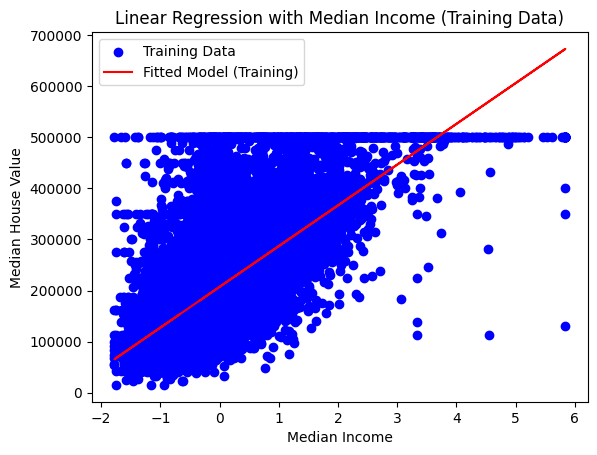

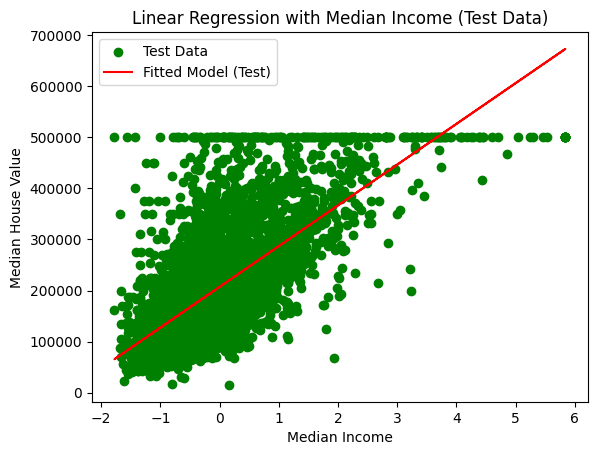

In [50]:
# prompt: Perform Linear Regression with one independent variable :
# Extract just the median_income column from the independent variables (from X_train and X_test).
# Perform Linear Regression to predict housing values based on median_income.
# Predict output for test dataset using the fitted model.
# Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data.

# Extract the median_income column from X_train and X_test
X_train_median_income = X_train[:, X.columns.get_loc('median_income')].reshape(-1, 1)
X_test_median_income = X_test[:, X.columns.get_loc('median_income')].reshape(-1, 1)

# Create a Linear Regression model
model_median_income = LinearRegression()

# Fit the model on the training data using only median_income
model_median_income.fit(X_train_median_income, Y_train)

# Predict the output for the test dataset using the fitted model
Y_pred_median_income = model_median_income.predict(X_test_median_income)

# Calculate the Root Mean Squared Error (RMSE)
rmse_median_income = math.sqrt(mean_squared_error(Y_test, Y_pred_median_income))

# Print the RMSE
print("Root Mean Squared Error (RMSE) for Median Income Linear Regression:", rmse_median_income)

import matplotlib.pyplot as plt

# Plot the fitted model for training data
plt.scatter(X_train_median_income, Y_train, color='blue', label='Training Data')
plt.plot(X_train_median_income, model_median_income.predict(X_train_median_income), color='red', label='Fitted Model (Training)')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Linear Regression with Median Income (Training Data)')
plt.legend()
plt.show()

# Plot the fitted model for test data
plt.scatter(X_test_median_income, Y_test, color='green', label='Test Data')
plt.plot(X_test_median_income, Y_pred_median_income, color='red', label='Fitted Model (Test)')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Linear Regression with Median Income (Test Data)')
plt.legend()
plt.show()


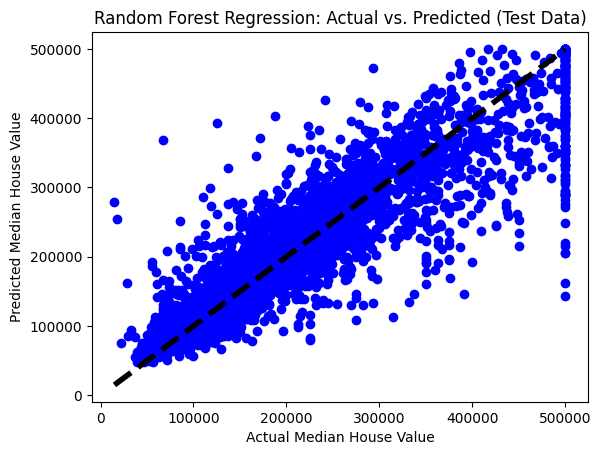

In [51]:
# prompt: plot the fitting model for test data  based on Random Forest Regression

# Plot the fitted model for test data using Random Forest Regression
plt.scatter(Y_test, rf_Y_pred, color='blue')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=4)
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Random Forest Regression: Actual vs. Predicted (Test Data)')
plt.show()


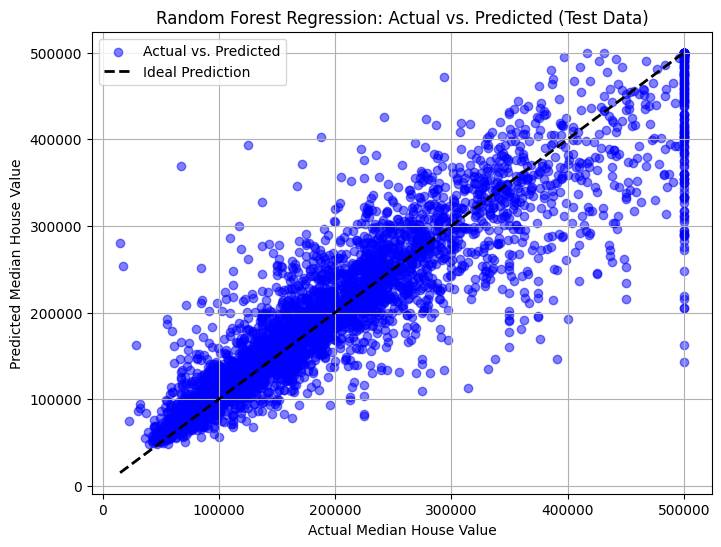

In [52]:
# prompt: base on the above with best data visualisation

import matplotlib.pyplot as plt

# Assuming you have Y_test and rf_Y_pred available from your previous code

# Plot the fitted model for test data using Random Forest Regression
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.scatter(Y_test, rf_Y_pred, color='blue', alpha=0.5, label='Actual vs. Predicted')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2, label='Ideal Prediction')
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Random Forest Regression: Actual vs. Predicted (Test Data)')
plt.legend()
plt.grid(True)  # Add grid lines for better readability
plt.show()


# You can also create histograms of residuals or other visualizations
# to gain deeper insights into the model's performance.
